#Iris classification

#1.Import libraries and data load

In [ ]:
#Importing Libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC

In [ ]:
#Loading the dataset
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Iris.csv')


#2.EXPLORATORY DATA ANALYSIS

#Data Profiling

In [ ]:
# Viewing the datasets first 5 rows
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [ ]:
# Display dataset summary
print("\n Dataset Summary:\n")
print(df.info())


 Dataset Summary:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB
None


Here are the info we received:
6 columns
150 rows
No null values
All data are numerical except for one column-"species", which contains data of objective type

In [ ]:
#Basic stats overview on the data
print("\n Stats Overview:")
df.describe()


 Stats Overview:


,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [ ]:
#remove the id
df = df.drop('Id', axis=1)

#Data quality check

In [ ]:
# Check for missing values
print("\n Missing Values:")
print(df.isnull().sum())


 Missing Values:
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64


No missing value found

In [ ]:
# Check for duplicated values
print("\n Duplicated Values:")
df.duplicated().sum()


 Duplicated Values:


np.int64(3)

No duplicate value found

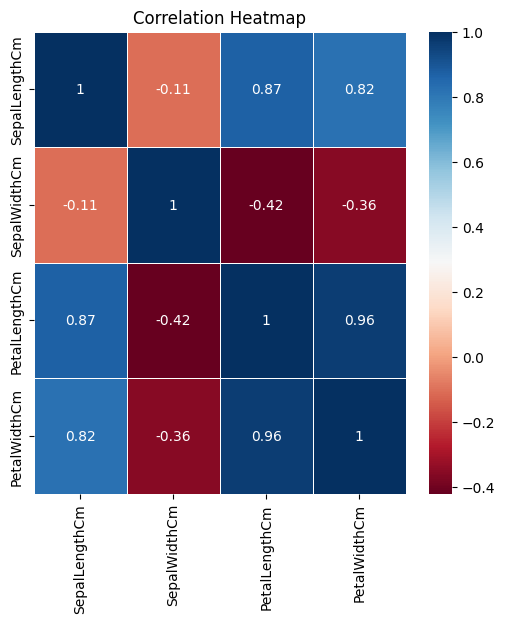

In [ ]:
#find correlation matrix
correlation_matrix = df.corr(numeric_only = True)

#visualize correlation matrix using a heatmap
plt.figure(figsize=(6, 6))
sns.heatmap(correlation_matrix,cmap="RdBu", annot=True, linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()

petal length and petal width have a strong positive correlation — larger petals also tend to be wider.
sepal width might have a weak or negative correlation with other features — its predictive power might be lower.

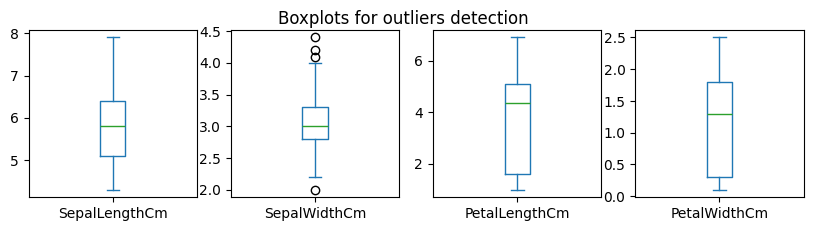

In [ ]:
#Boxplot of all the numerical columns to check the outliers
df.plot(kind='box', subplots=True, layout=(4,4), figsize=(10,10))
plt.suptitle("Boxplots for outliers detection",y=0.9)
plt.show()

#Handling outliers

In [ ]:
df_copy = df.copy()

for column in df_copy.select_dtypes(include=['float64', 'int64']).columns:
  #IQR method for handling outliers
  Q1 = df_copy[column].quantile(0.25)
  Q3 = df_copy[column].quantile(0.75)
  IQR = Q3 - Q1
  #defining lower and upper bounds
  lower_bound = Q1 - 1.5 * IQR
  upper_bound = Q3 + 1.5 * IQR
  #replacing outliers with mean values
  df_copy.loc[df_copy[column] < lower_bound, column] = df_copy[column].mean().astype(int)
  df_copy.loc[df_copy[column] > upper_bound, column] = df_copy[column].mean().astype(int)


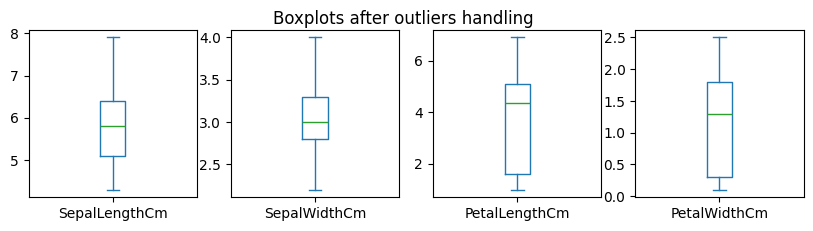

In [ ]:
#Checking after outlier detection and removal
df_copy.plot(kind='box', subplots=True, layout=(4,4), figsize=(10,10))
plt.suptitle("Boxplots after outliers handling",y=0.9)
plt.show()

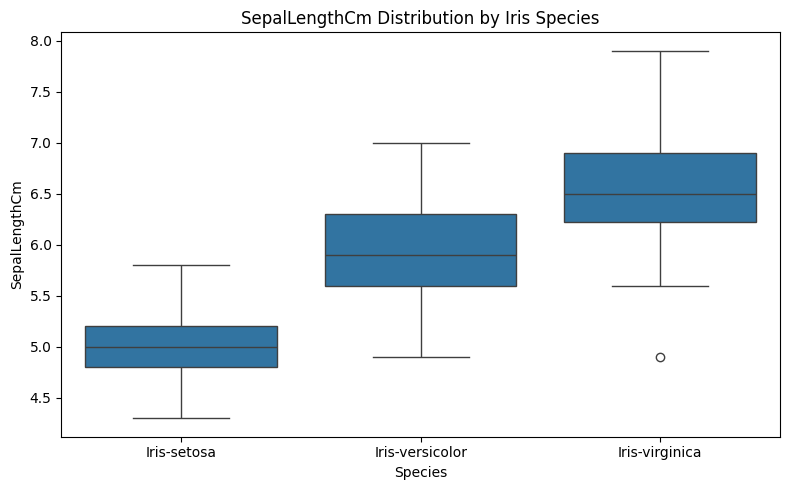

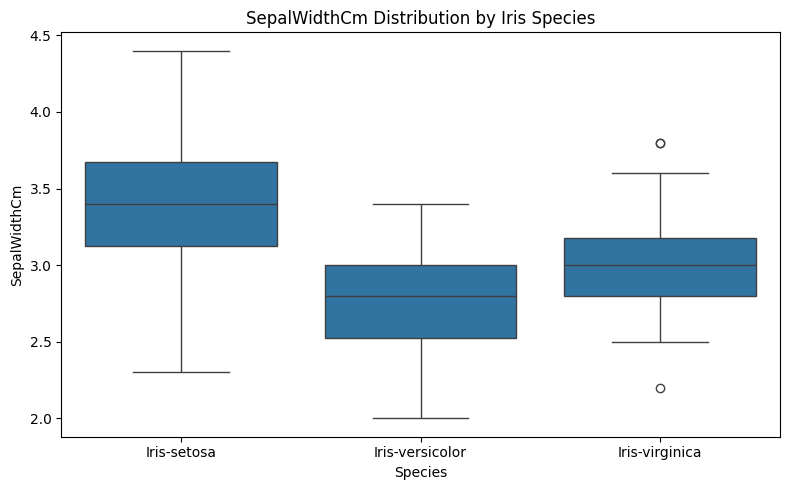

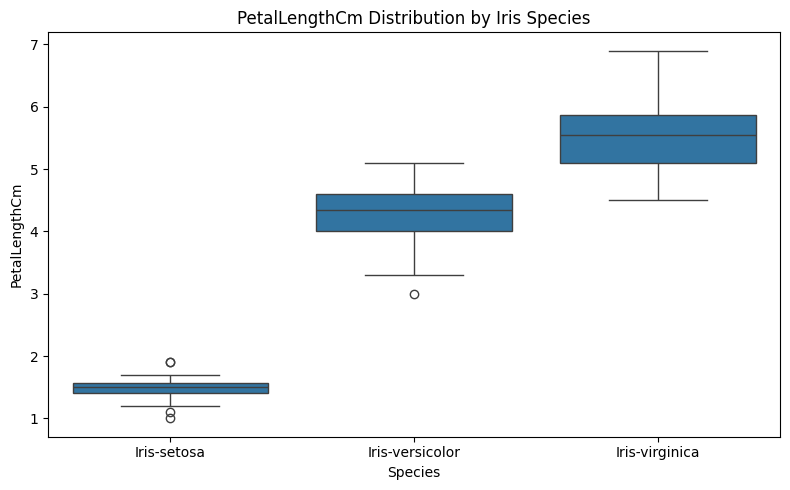

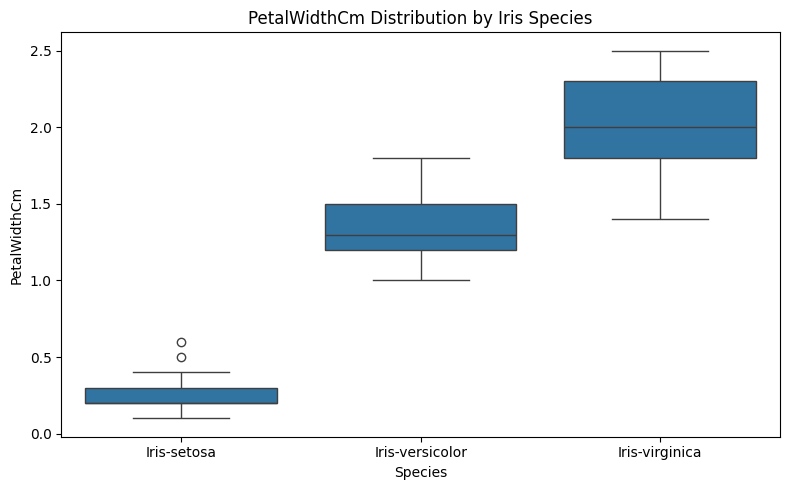

In [ ]:
features = ['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']

for feature in features:
    plt.figure(figsize=(8, 5))
    sns.boxplot(x='Species', y=feature, data=df)
    plt.title(f'{feature} Distribution by Iris Species')
    plt.xlabel('Species')
    plt.ylabel(feature)
    plt.tight_layout()
    plt.show()


In [ ]:
print(X.columns)
print(X.shape)

Index(['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm'], dtype='object')
(150, 4)


#3.Training and Testing

In [ ]:
from sklearn.model_selection import train_test_split

# 1. Separate features and target variable
# Automatically select numerical columns
num_cols = df.select_dtypes(include=['float64', 'int64']).columns
X = df[num_cols]
y = df['Species']  # Target variable

# 2. Split the data into training and testing sets (80/20 split)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# 3. Display the shapes of the training and testing sets
print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)


Shape of X_train: (120, 4)
Shape of X_test: (30, 4)
Shape of y_train: (120,)
Shape of y_test: (30,)


In [ ]:
from sklearn.preprocessing import StandardScaler, LabelEncoder

# Select only the 4 iris features (assuming DataFrame)
X_train_selected = X_train[["SepalLengthCm", "SepalWidthCm", "PetalLengthCm", "PetalWidthCm"]]
X_test_selected = X_test[["SepalLengthCm", "SepalWidthCm", "PetalLengthCm", "PetalWidthCm"]]

# Fit scaler on selected features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_selected)
X_test_scaled = scaler.transform(X_test_selected)

# Fit label encoder
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)

In [ ]:
print(X.columns)
print(X.shape)


Index(['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm'], dtype='object')
(150, 4)


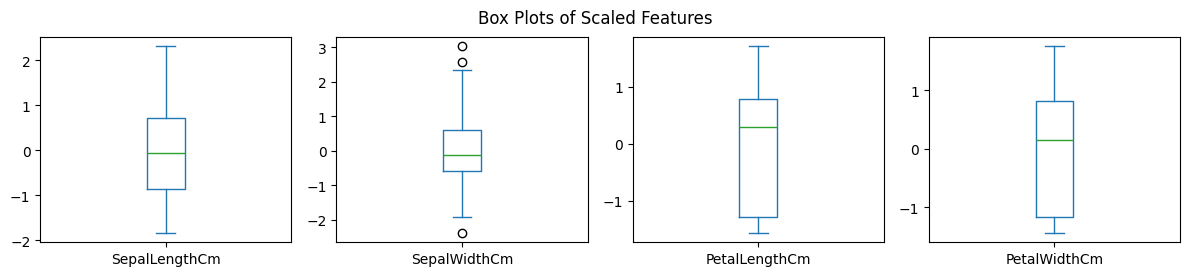

In [ ]:
df_scaled = pd.DataFrame(X_train_scaled, columns=X_train_selected.columns)

#Box-plot after Scaling
df_scaled.plot(kind='box', subplots=True, layout=(4,4), sharex=False, sharey=False, figsize=(12, 10))
plt.suptitle("Box Plots of Scaled Features")
plt.tight_layout()
plt.show()

#Model Selection

We'll try four different classification models:

Random Forest Classifier,
Logistic Regression,
K-Nearest Neighbors,
Decision Tree Classifier


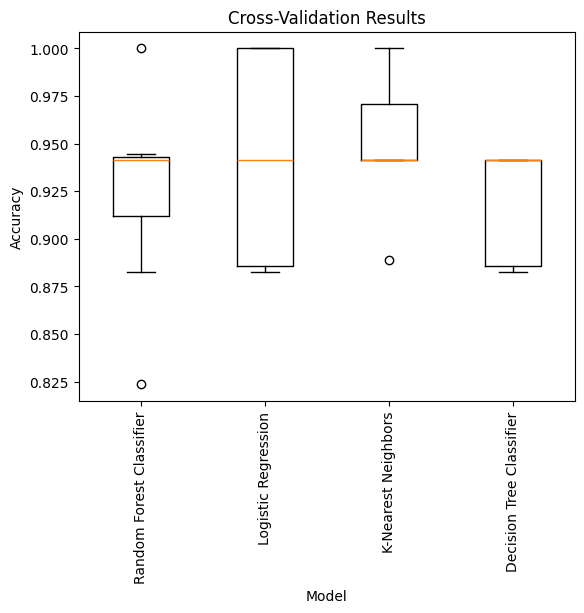

In [ ]:

models = {
    "Random Forest Classifier": RandomForestClassifier(),
    "Logistic Regression": LogisticRegression(),
    "K-Nearest Neighbors": KNeighborsClassifier(),
    "Decision Tree Classifier": DecisionTreeClassifier(),

}
#Creating a list that will hold cross-validation scores of all models
results = []

#Creating a KFold object
#This performs training and validation for a same model for 7 times
#Every time, the validation data changes.
kf = KFold(n_splits=7, random_state=42, shuffle=True)

# Loop through the models' values
for model in models.values():

  # Perform cross-validation
  cv_scores = cross_val_score(model, X_train_scaled, y_train_encoded, cv=kf, scoring='accuracy')

  # Append the results
  results.append(cv_scores)

# Create a box plot of the results
plt.boxplot(results, tick_labels=models.keys())
plt.title("Cross-Validation Results")
plt.xlabel("Model")
plt.xticks(rotation=90)
plt.ylabel("Accuracy")
plt.show()

In [ ]:
test_mse = {}
for name, model in models.items():

  # Fit the model to the training data
  model.fit(X_train_scaled,y_train_encoded)

  # Make predictions on the test set
  y_pred = model.predict(X_test_scaled)

  # Calculate the test accuracy
  test_accuracy = accuracy_score(y_test_encoded, y_pred)

  # Store the test accuracy in the dictionary
  test_mse[name] = test_accuracy
  print(f"{name} test accuracy: {test_accuracy}")

Random Forest Classifier test accuracy: 1.0
Logistic Regression test accuracy: 1.0
K-Nearest Neighbors test accuracy: 1.0
Decision Tree Classifier test accuracy: 1.0


In [ ]:
#Create the decision tree classifier model
baseline_model = RandomForestClassifier()

#Fit the model to the training data
baseline_model.fit(X_train_scaled, y_train_encoded)

#Make predictions on the test set
y_pred = baseline_model.predict(X_test_scaled)

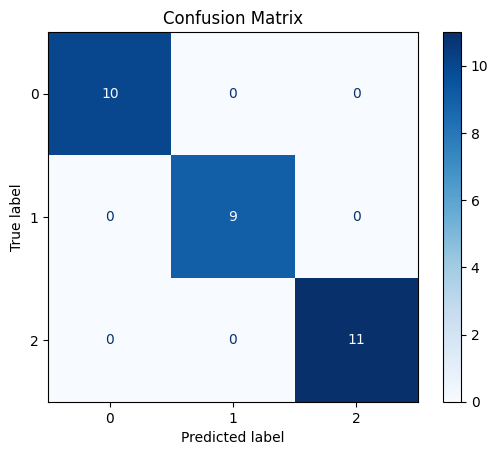

In [ ]:
#Visualizing in confusion matrix
cm = confusion_matrix(y_test_encoded, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap="Blues")
plt.title("Confusion Matrix")
plt.show()

#4.Tuning HyperParameter

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

In [ ]:
# Hyperparameter grid for RandomForestClassifier or DecisionTreeClassifier
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': np.arange(5, 55, 5),
    'min_samples_split': np.arange(2, 10, 1),
    'min_samples_leaf': np.arange(1, 10),
    'max_features': [None, 'sqrt', 'log2']
}


In [ ]:
dtc_cv = RandomizedSearchCV(baseline_model, param_grid, cv=kf, n_jobs=-1, verbose=1, n_iter=100)

In [ ]:
dtc_cv.fit(X_train_scaled, y_train_encoded)

Fitting 7 folds for each of 100 candidates, totalling 700 fits


RandomizedSearchCV(cv=KFold(n_splits=7, random_state=42, shuffle=True),
                   estimator=RandomForestClassifier(), n_iter=100, n_jobs=-1,
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': array([ 5, 10, 15, 20, 25, 30, 35, 40, 45, 50]),
                                        'max_features': [None, 'sqrt', 'log2'],
                                        'min_samples_leaf': array([1, 2, 3, 4, 5, 6, 7, 8, 9]),
                                        'min_samples_split': array([2, 3, 4, 5, 6, 7, 8, 9])},
                   verbose=1)

In [ ]:
#Printing the tuned parameters and validation score
print("Tuned paramaters: {}".format(dtc_cv.best_params_))
print("Tuned score: {}".format(dtc_cv.best_score_))

Tuned paramaters: {'min_samples_split': np.int64(7), 'min_samples_leaf': np.int64(6), 'max_features': 'log2', 'max_depth': np.int64(45), 'criterion': 'gini'}
Tuned score: 0.9505135387488328


In [ ]:
#Get the tuned model
tuned_model = dtc_cv.best_estimator_

In [ ]:
tuned_model

RandomForestClassifier(max_depth=np.int64(45), max_features='log2',
                       min_samples_leaf=np.int64(6),
                       min_samples_split=np.int64(7))

In [ ]:
#Make predictions on the test set using the tuned model
y_pred_tuned = tuned_model.predict(X_test_scaled)

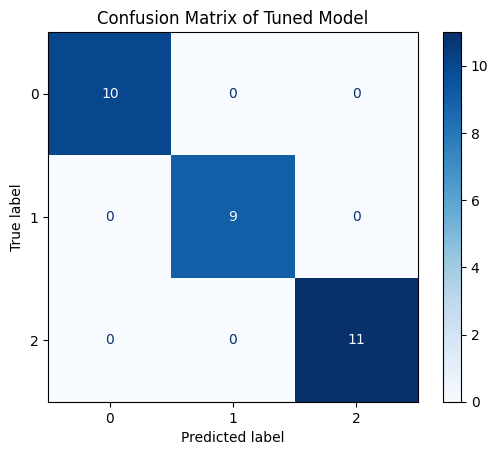

In [ ]:
#Visualizing in confusion matrix
cm = confusion_matrix(y_test_encoded, y_pred_tuned)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap="Blues")
plt.title("Confusion Matrix of Tuned Model")
plt.show()


In [ ]:
# Calculate evaluation metrics
accuracy = accuracy_score(y_test_encoded, y_pred_tuned)
precision = precision_score(y_test_encoded, y_pred_tuned, average='weighted')
recall = recall_score(y_test_encoded, y_pred_tuned, average='weighted')
f1 = f1_score(y_test_encoded, y_pred_tuned, average='weighted')

# Display results
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision (weighted): {precision:.4f}")
print(f"Recall (weighted): {recall:.4f}")
print(f"F1-score (weighted): {f1:.4f}")
print("\n" + "="*30 + "\n")
print(f"Model is {accuracy*100:.2f}% accurate.")
print("\n" + "="*30)
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
encoder.fit(y)
print(classification_report(y_test_encoded, y_pred_tuned, target_names=encoder.classes_))

Accuracy: 1.0000
Precision (weighted): 1.0000
Recall (weighted): 1.0000
F1-score (weighted): 1.0000


Model is 100.00% accurate.

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       1.00      1.00      1.00         9
 Iris-virginica       1.00      1.00      1.00        11

       accuracy                           1.00        30
      macro avg       1.00      1.00      1.00        30
   weighted avg       1.00      1.00      1.00        30



#Saving the model

In [ ]:
import joblib
# Save the baseline model
joblib.dump(baseline_model, 'iris_baseline_random_forest.pkl')

# Save the scaler used during preprocessing
joblib.dump(scaler, "iris_scaler.pkl")

# Save the tuned model
joblib.dump(dtc_cv.best_estimator_, 'iris_tuned_random_forest.pkl')

['iris_tuned_random_forest.pkl']

#Conclusion

This notebook presented a complete workflow for classifying Iris flower species based on their morphological features: sepal length, sepal width, petal length, and petal width. The dataset was clean, with no missing or duplicate values, and provided a balanced distribution across the three species—Setosa, Versicolor, and Virginica.

During the exploratory data analysis (EDA), insightful visualizations such as box plots and scatter plots highlighted clear separability between the classes, especially with petal measurements. This suggested the dataset was well-suited for classification tasks.

After preprocessing steps—including label encoding and feature scaling—the dataset was split into training and testing subsets. Several machine learning models were then trained and evaluated using cross-validation. Among the models tested—Logistic Regression, K-Nearest Neighbors, Decision Tree, and Random Forest—the Random Forest Classifier showed the best and most consistent performance.

To improve model accuracy further, hyperparameter tuning using Grid Search was performed. The optimized model demonstrated excellent accuracy, precision, recall, and F1-score on the test set, correctly classifying all three species.

The final tuned Random Forest model proves to be highly effective in identifying Iris flower species based on measurable characteristics. It not only reinforces the predictive strength of tree-based models on structured datasets but also lays the foundation for deploying this solution in educational tools, botanical studies, or mobile plant identification applications.